https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_TIP

In [3]:
X = data_TIP.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=104.828442, expected=103.087402
predicted=103.388576, expected=103.189217
predicted=103.173265, expected=104.244545
predicted=104.135801, expected=103.161469
predicted=103.384701, expected=103.800209
predicted=103.760171, expected=103.513222
predicted=103.640289, expected=103.670593
predicted=103.720020, expected=103.772438
predicted=103.839466, expected=104.281593
predicted=104.296919, expected=103.753922
predicted=103.929510, expected=103.402153
predicted=103.518038, expected=103.818726
predicted=103.819661, expected=103.383621
predicted=103.526617, expected=102.670830
predicted=102.826788, expected=103.038284
predicted=103.024551, expected=103.242500
predicted=103.268908, expected=102.230682
predicted=102.477169, expected=103.660210
predicted=103.572774, expected=103.355789
predicted=103.389982, expected=103.365074
predicted=103.516747, expected=103.337212
predicted=103.377188, expected=103.058548
predicted=103.207529, expected=101.944008
predicted=102.161297, expected=101

predicted=109.319270, expected=109.824326
predicted=109.825382, expected=110.495201
predicted=110.407270, expected=111.442299
predicted=111.354004, expected=111.550827
predicted=111.565013, expected=111.106873
predicted=111.263600, expected=111.047676
predicted=111.145502, expected=111.146339
predicted=111.198675, expected=111.925705
predicted=111.873806, expected=111.373238
predicted=111.495184, expected=111.782654
predicted=111.835966, expected=112.039246
predicted=112.030655, expected=112.414261
predicted=112.434724, expected=113.756393


In [9]:
error_TIP = math.sqrt(mean_squared_error(test, predictions))
%store error_TIP
print('Test RMSE: %.3f' % error_TIP)

Stored 'error_TIP' (float)
Test RMSE: 0.609


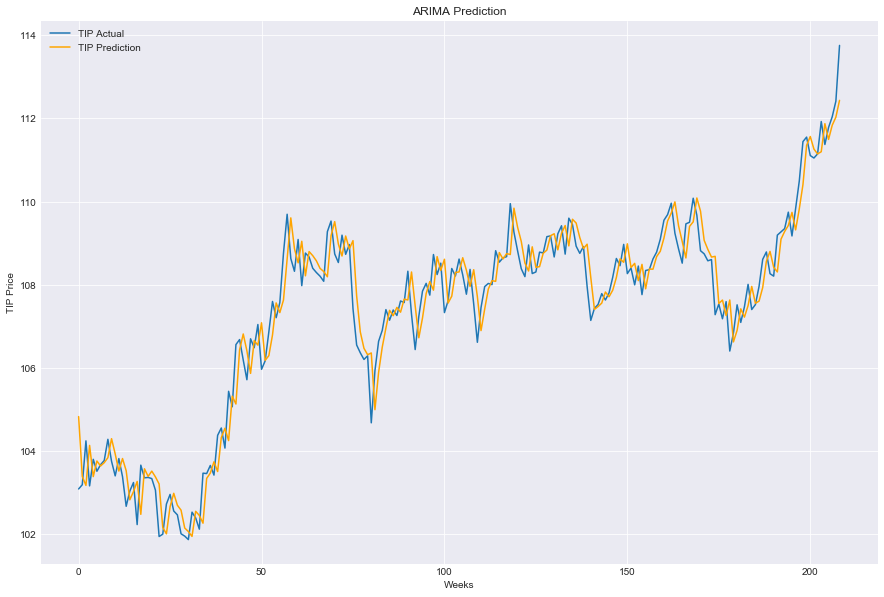

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'TIP Actual')
plt.plot(predictions, color='orange', label = 'TIP Prediction')
plt.xlabel('Weeks')
plt.ylabel('TIP Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_TIP = pd.DataFrame(predictions) 
ARIMA_pred_TIP.columns = ['ARIMA_pred_TIP']
%store ARIMA_pred_TIP

Stored 'ARIMA_pred_TIP' (DataFrame)
